In [73]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
%matplotlib inline

In [33]:
df = pd.read_csv("olist_processado.csv")

In [34]:
df.head(2)

,customer_id,customer_city,customer_state,order_id,order_purchase_timestamp,order_item_id,product_id,price,review_id,review_score,customer_lat,customer_long,product_category_name,quantidade_item
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,88b8b52d46df026a9d1ad2136a59b30b,4,-20.500253,-47.400367,moveis_escritorio,1
1,8912fc0c3bbf1e2fbf35819e21706718,santarem,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,1,a9516a079e37a9c9c36b9b78b10169e8,112.99,7fc63200f12eebb5f387856afdd63db8,1,-2.441535,-54.720801,moveis_escritorio,2


In [35]:
df.dtypes

customer_id                  object
customer_city                object
customer_state               object
order_id                     object
order_purchase_timestamp     object
order_item_id                 int64
product_id                   object
price                       float64
review_id                    object
review_score                  int64
customer_lat                float64
customer_long               float64
product_category_name        object
quantidade_item               int64
dtype: object

In [36]:
data = df[['customer_id', 'review_score', 'product_category_name', 'quantidade_item', 'product_id', 'price']]

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113622 entries, 0 to 113621
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   customer_id            113622 non-null  object 
 1   review_score           113622 non-null  int64  
 2   product_category_name  113622 non-null  object 
 3   quantidade_item        113622 non-null  int64  
 4   product_id             113622 non-null  object 
 5   price                  113622 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 5.2+ MB


In [38]:
data.product_category_name=data.product_category_name.astype('category').cat.codes
data.customer_id=data.customer_id.astype('category').cat.codes
data.product_id=data.product_id.astype('category').cat.codes

/home/ariana/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
data.tail()

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113622 entries, 0 to 113621
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   customer_id            113622 non-null  int32  
 1   review_score           113622 non-null  int64  
 2   product_category_name  113622 non-null  int8   
 3   quantidade_item        113622 non-null  int64  
 4   product_id             113622 non-null  int16  
 5   price                  113622 non-null  float64
dtypes: float64(1), int16(1), int32(1), int64(2), int8(1)
memory usage: 3.4 MB


In [67]:
x = data[['customer_id', 'product_id', 'product_category_name', 'quantidade_item', 'price']]
y = data['review_score']

In [68]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [69]:
#Prepare data for classification process
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 4  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
Pred_y = neigh.predict(x_test)
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=4 is 0.4565016501650165


Minimum error:- 0.44215621562156215 at K = 38


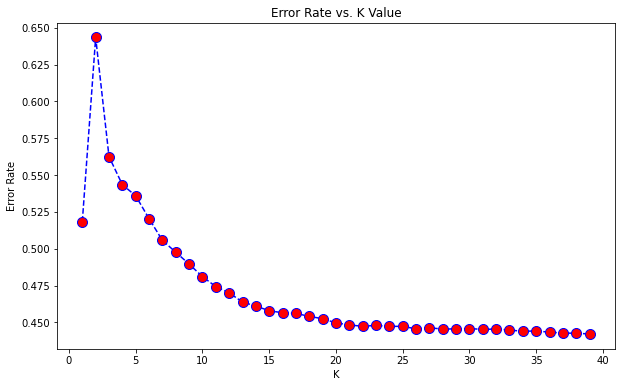

In [74]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.5578437843784378 at K = 38


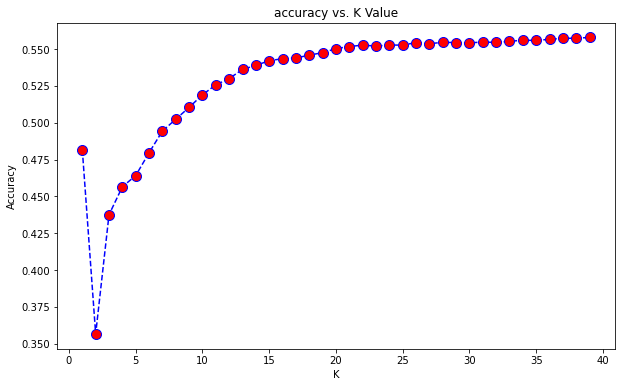

In [79]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))